In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#NYbestlist is the NY times best seller list
#weeks_on_list is the number of weeks a book was on the best seller list

NYbestlist_df = pd.read_csv("Resources/books_uniq_weeks.csv",encoding = 'unicode_escape')
NYbestlist_df['date'] = pd.to_datetime(NYbestlist_df['date'])
NYbestlist_df['year'] = NYbestlist_df['date'].dt.year
NYbestlist_df['month'] = NYbestlist_df['date'].dt.month

NYbestlist_df.head()


,publisher,author,primary_isbn10,primary_isbn13,date,contributor,title,weeks_on_list,year,month
0,Riverhead,Paula Hawkins,1594634025,9.78E+12,2017-02-19,by Paula Hawkins,THE GIRL ON THE TRAIN,102,2017,2
1,Scribner,Anthony Doerr,1501173219,9.78E+12,2017-05-07,by Anthony Doerr,ALL THE LIGHT WE CANNOT SEE,81,2017,5
2,Vintage,E L James,525431888,9.78E+12,2017-03-05,by E. L. James,FIFTY SHADES DARKER,66,2017,3
3,St. Martin's,Kristin Hannah,1466850604,9.78E+12,2017-10-29,by Kristin Hannah,THE NIGHTINGALE,63,2017,10
4,Penguin Group,Kathryn Stockett,1440697663,9.78E+12,2012-04-08,by Kathryn Stockett,THE HELP,58,2012,4


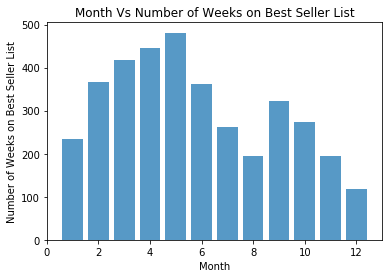

In [5]:
nybest_weeks_permonth = NYbestlist_df.groupby("month")["weeks_on_list"].sum()
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(month,nybest_weeks_permonth, alpha=0.75, align="center")
plt.title("Month Vs Number of Weeks on Best Seller List")
plt.xlabel("Month")
plt.ylabel("Number of Weeks on Best Seller List")
plt.savefig("Weeks_on_list.png")
plt.show()

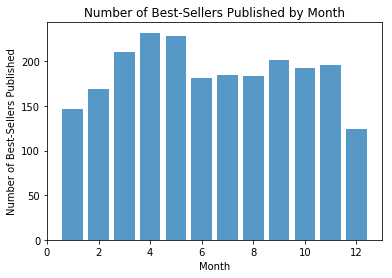

In [10]:
releasedf = NYbestlist_df.groupby("month")["month"].count()
plt.bar(month,releasedf, alpha=0.75, align="center")
plt.title("Number of Best-Sellers Published by Month")
plt.xlabel("Month")
plt.ylabel("Number of Best-Sellers Published")
plt.savefig("graphs/NYBooks_published.png")
plt.show()

In [6]:
book_count = NYbestlist_df["publisher"].value_counts()

top10publishers = book_count[0:10]

top10publishers



Putnam                     128
Penguin Group              111
Berkley                     89
Simon & Schuster            78
Little, Brown               77
Grand Central               72
St. Martin's                69
Harlequin                   57
Ballantine                  52
Random House Publishing     49
Name: publisher, dtype: int64

In [7]:
author_count = NYbestlist_df["author"].value_counts()

top10authors = author_count[0:10]

top10authors


Danielle Steel      32
Susan Mallery       30
Christine Feehan    28
Stuart Woods        27
Debbie Macomber     26
Nora Roberts        25
Ron Carr            23
Maya Banks          22
David Baldacci      20
Marie Force         20
Name: author, dtype: int64

Text(0,0.5,'Number of publishers')

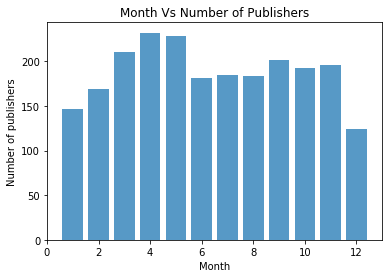

In [7]:
publisher_permonth = NYbestlist_df.groupby("month")["publisher"].count()

plt.bar(month,publisher_permonth, alpha=0.75, align="center")
plt.title("Month Vs Number of Publishers")
plt.xlabel("Month")
plt.ylabel("Number of publishers")

